In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Data Cleaning & Pre-processing

In [2]:
#Renaming target variable from 'y' to 'deposit' 
df.rename(columns={'y': 'deposit'}, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
#Remove Unwanted Features
df.drop(columns=['day'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  deposit    4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 565.3+ KB


In [4]:
#Checking for missing data
missing_data = df.isnull().sum()
missing_data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


## Data Visualization

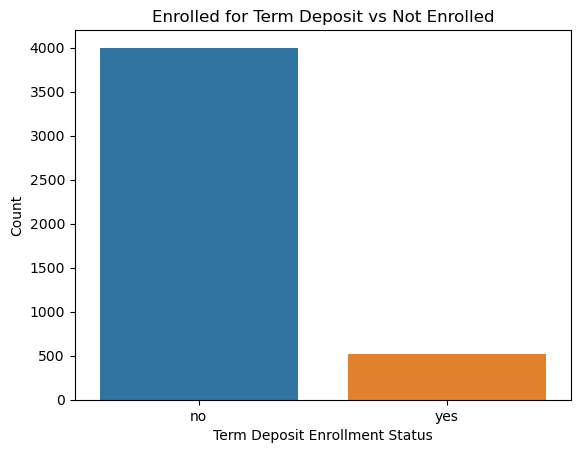

In [6]:
sns.countplot(x='deposit', data=df)
plt.title('Enrolled for Term Deposit vs Not Enrolled')
plt.xlabel('Term Deposit Enrollment Status')
plt.ylabel('Count')
plt.show()

In [7]:
print(df['deposit'].value_counts())

no     4000
yes     521
Name: deposit, dtype: int64


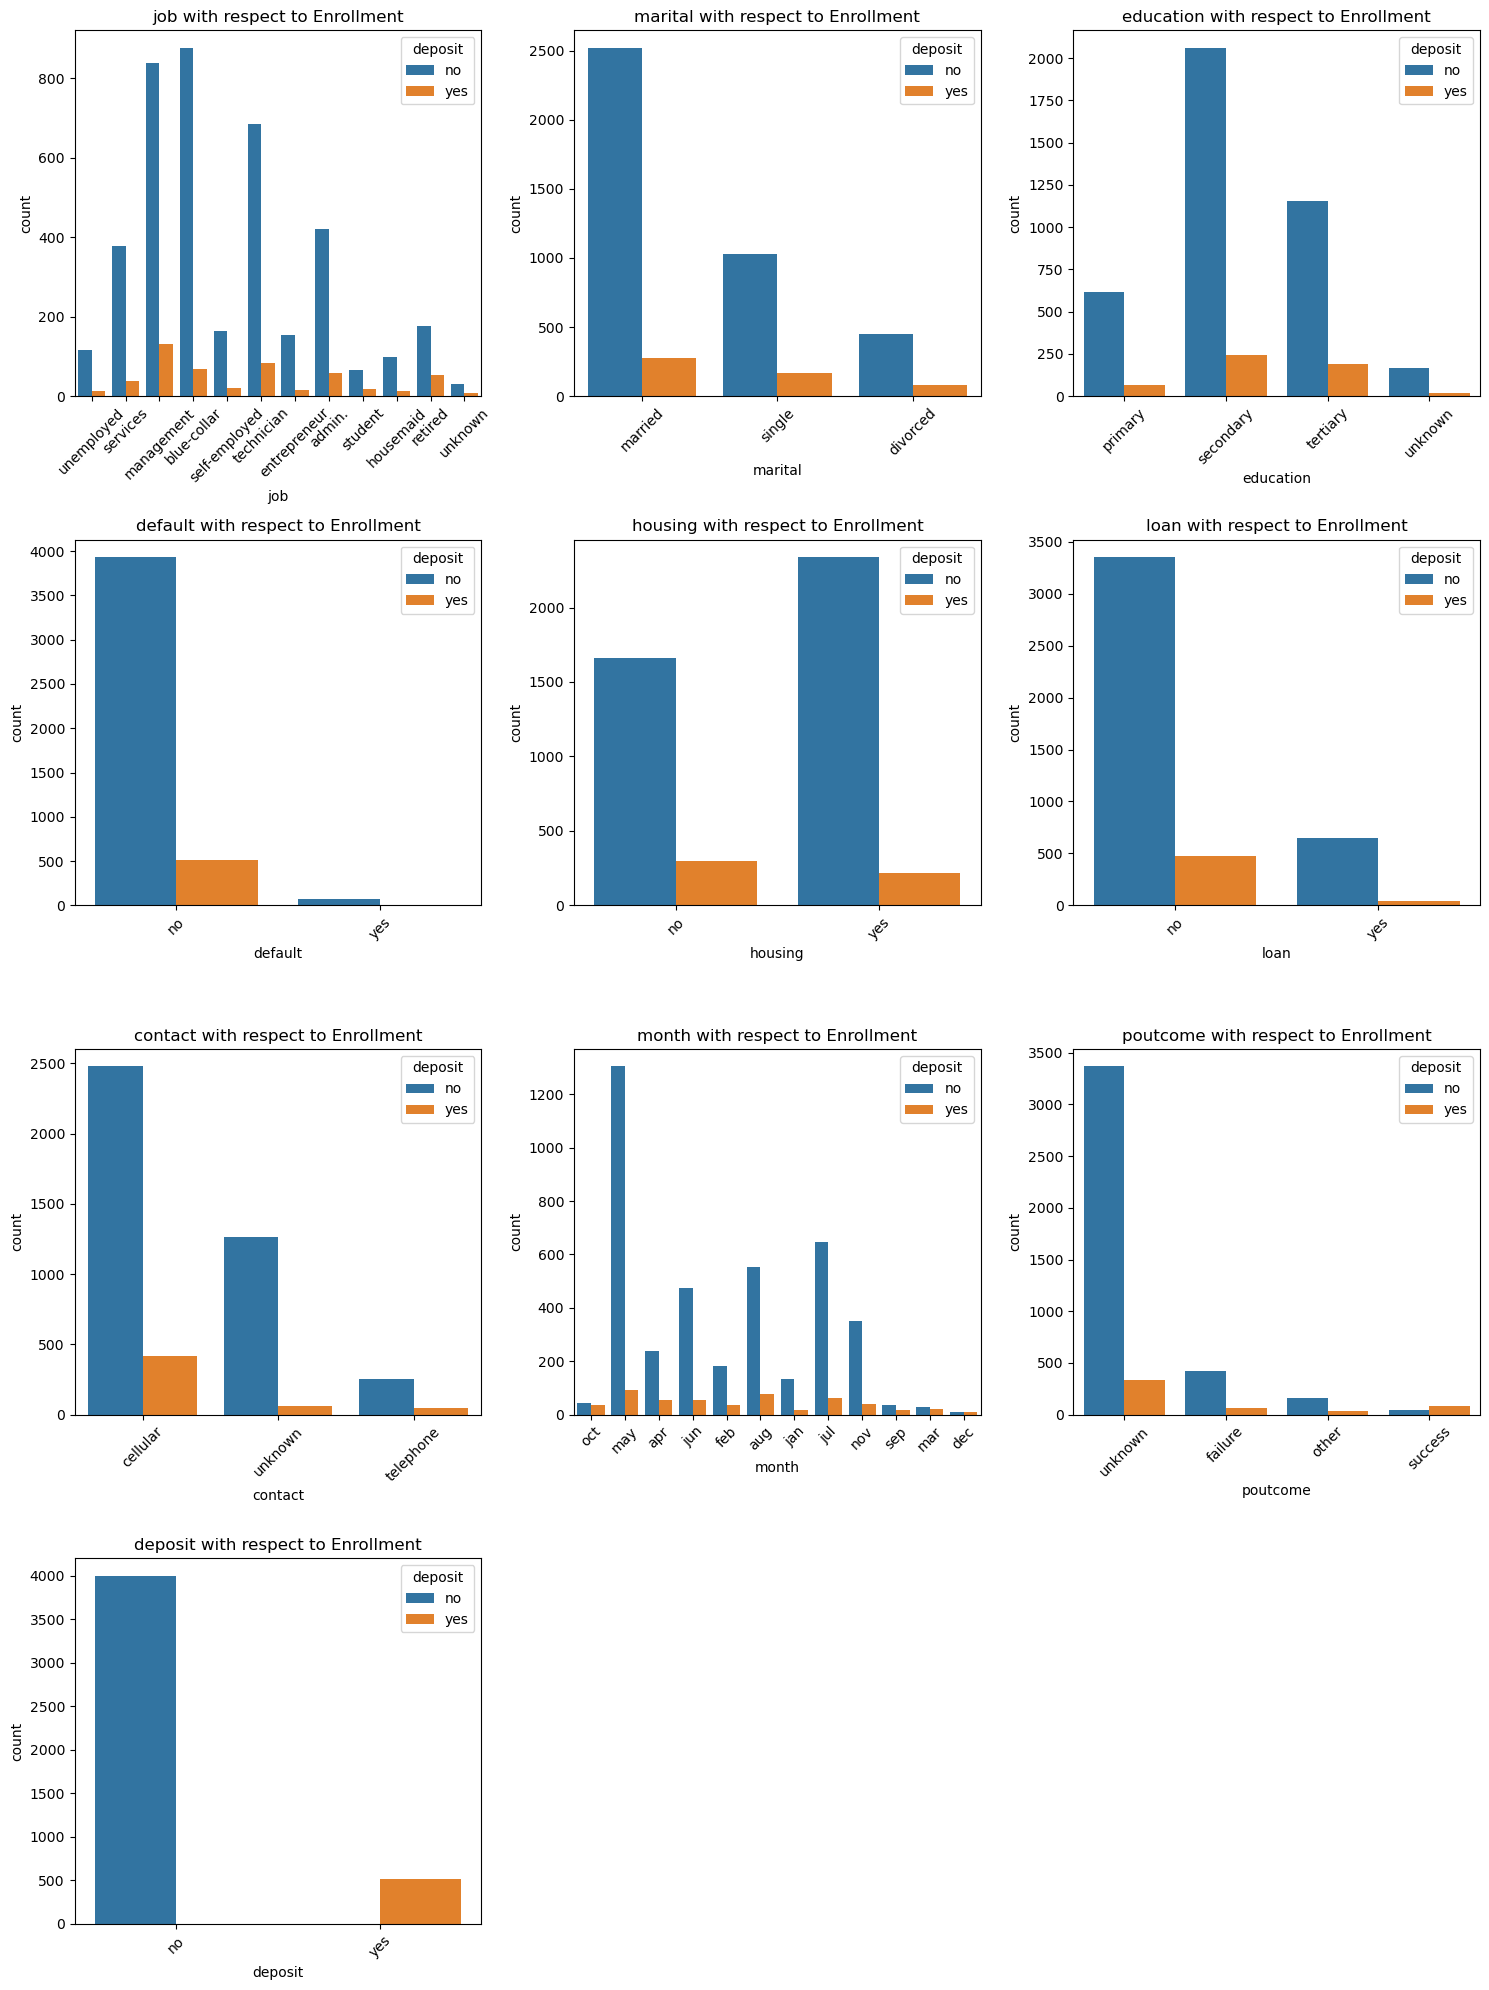

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns

# Calculate the number of rows needed for the subplots
num_rows = max((len(cat_cols) + 2) // 3, 1)  # Set a minimum value of 1

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='deposit', ax=axes[i])
    axes[i].set_title(f'{col} with respect to Enrollment')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

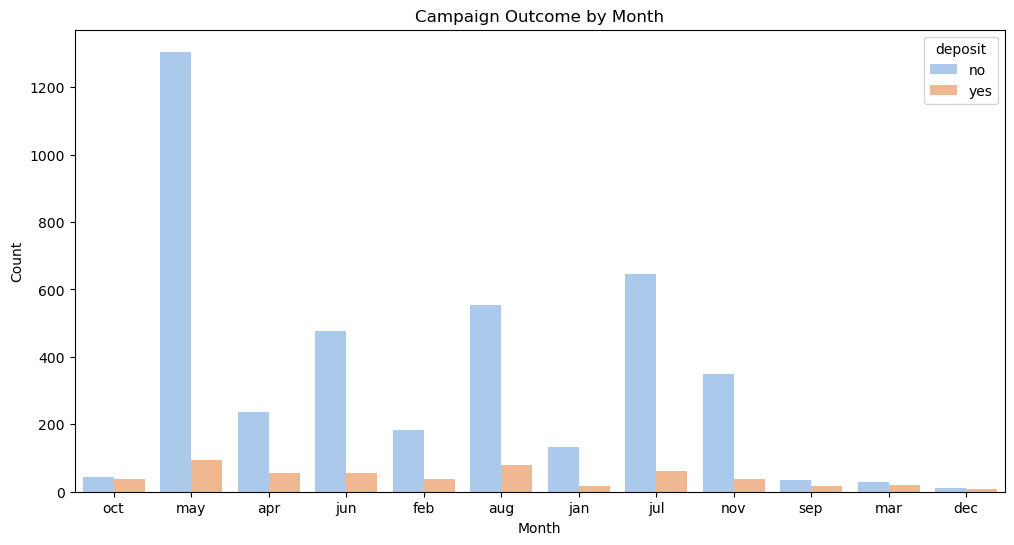

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='deposit', data = df, palette='pastel')
plt.title('Campaign Outcome by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [10]:
#Converting categorical columns to numeric data
le = LabelEncoder()

for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])
df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,10,1,0,0,1787,0,0,0,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,3,129,4,211,3,1,0


In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

In [12]:
#Removing unwanted Features
x = df.drop([ 'contact', 'month','pdays','previous','deposit'],axis =1)
y=df["deposit"]


In [13]:
x

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome
0,30,10,1,0,0,1787,0,0,79,1,3
1,33,7,1,1,0,4789,1,1,220,1,0
2,35,4,2,2,0,1350,1,0,185,1,0
3,30,4,1,2,0,1476,1,1,199,4,3
4,59,1,1,1,0,0,1,0,226,1,3
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,329,5,3
4517,57,6,1,2,1,-3313,1,1,153,1,3
4518,57,9,1,1,0,295,0,0,151,11,3
4519,28,1,1,1,0,1137,0,0,129,4,1


In [14]:
#Feature Scaling - Standardizing data

st = StandardScaler()
x["balance"] = st.fit_transform(x[["balance"]])
x["duration"] = st.fit_transform(x[["duration"]])
x

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome
0,30,10,1,0,0,0.121072,0,0,-0.711861,1,3
1,33,7,1,1,0,1.118644,1,1,-0.169194,1,0
2,35,4,2,2,0,-0.024144,1,0,-0.303898,1,0
3,30,4,1,2,0,0.017726,1,1,-0.250017,4,3
4,59,1,1,1,0,-0.472753,1,0,-0.146102,1,3
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-0.583410,1,0,0.250315,5,3
4517,57,6,1,2,1,-1.573671,1,1,-0.427057,1,3
4518,57,9,1,1,0,-0.374724,0,0,-0.434754,11,3
4519,28,1,1,1,0,-0.094925,0,0,-0.519426,4,1


## Developing Machine Learning Algorithms 

In [15]:
#Splitting the dataset for training and testing 

x_train , x_test ,y_train ,y_test =train_test_split(x,y ,test_size=0.25 ,random_state= 42)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(4521, 11)
(3390, 11)
(1131, 11)


In [16]:
#Defining common function for model evaluation 

def train_evaluate_model(model, x_train, y_train, x_test,y_test):
#  
#     Keyword arguments:
#     X -- Training data
#     y -- Traing labels

#     returns a dataframe for evaluating metrics
# 
    
    model.fit(x_train, y_train)  #fit the model instance 

    predictions = model.predict(x_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

In [17]:
#1 Applying Logistic Regression algorithm 

lg = LogisticRegression(penalty ="l2" ,C=0.5)
results = train_evaluate_model(lg, x_train, y_train, x_test, y_test)
results.index = ['LogisticRegression']
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.893899,0.318182,0.549020,0.224000,0.600569


In [18]:
#2 Applying Decision Tree Algorithm 
decision_tree = DecisionTreeClassifier(max_depth= 5,max_features=4)
decision_tree_results = train_evaluate_model(decision_tree,x_train, y_train, x_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = results.append(decision_tree_results)
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.893899,0.318182,0.549020,0.224000,0.600569
DecisionTree,0.895668,0.169014,0.705882,0.096000,0.545515


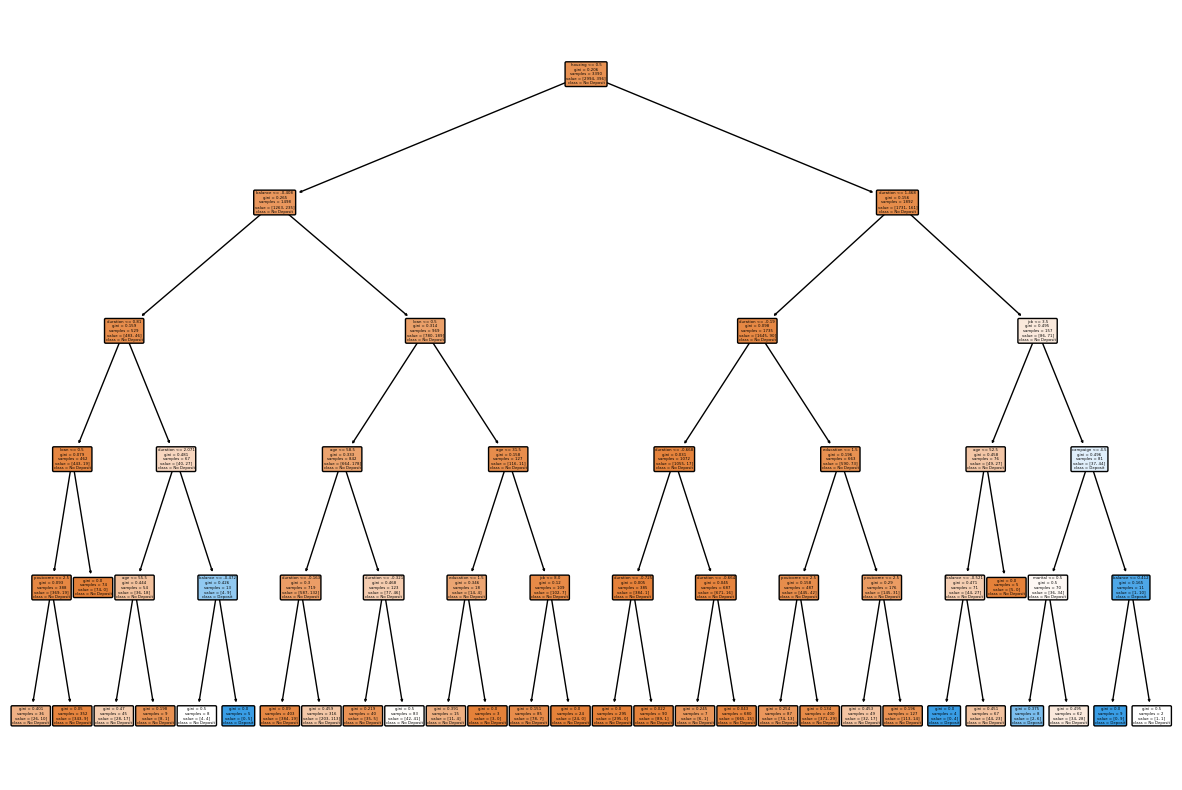

In [19]:
#Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names= x.columns.tolist(), class_names=['No Deposit', 'Deposit'], filled=True, rounded=True)
plt.show()

In [20]:
#3 Applying KNN Algorithm 
KNN = KNeighborsClassifier(n_neighbors=13,metric="minkowski")
knn = train_evaluate_model(KNN, x_train, y_train, x_test, y_test)
knn.index =['KNearsNeighbors']
results = results.append(knn)

results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.893899,0.318182,0.549020,0.224000,0.600569
DecisionTree,0.895668,0.169014,0.705882,0.096000,0.545515
KNearsNeighbors,0.887710,0.072993,0.416667,0.040000,0.516521


In [21]:
#4 Applying Random Forest Algorithm
rfc = RandomForestClassifier(max_features=9, min_samples_split=4, n_estimators=91)
rfc_result = train_evaluate_model(rfc, x_train, y_train, x_test, y_test)
rfc_result.index = ['RandomForest']

results = results.append(rfc_result)

results.sort_values(by='f1_score',
ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.894783,0.407960,0.539474,0.328000,0.646604
LogisticRegression,0.893899,0.318182,0.549020,0.224000,0.600569
DecisionTree,0.895668,0.169014,0.705882,0.096000,0.545515
KNearsNeighbors,0.887710,0.072993,0.416667,0.040000,0.516521


## Testing our algortihms with dummy data while having balanced distribution for target variable 'deposit'.

In [22]:
import numpy as np
import pandas as pd

#Set a random seed for reproducibility
np.random.seed(42)

#Generate dummy data
num_samples = 100
features = {
    'age': np.random.randint(18, 65, num_samples),
    'job': np.random.choice(['management', 'services', 'blue-collar', 'unemployed'], num_samples),
    'marital': np.random.choice(['married', 'single', 'divorced'], num_samples),
    'education': np.random.choice(['primary', 'secondary', 'tertiary'], num_samples),
    'default': np.random.choice(['no', 'yes'], num_samples),
    'balance': np.random.randint(-1000, 10000, num_samples),
    'housing': np.random.choice(['no', 'yes'], num_samples),
    'loan': np.random.choice(['no', 'yes'], num_samples),
    'contact': np.random.choice(['cellular', 'telephone'], num_samples),
    'day': np.random.randint(1, 31, num_samples),
    'month': np.random.choice(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], num_samples),
    'duration': np.random.randint(1, 500, num_samples),
    'campaign': np.random.randint(1, 10, num_samples),
    'pdays': np.random.randint(-1, 30, num_samples),
    'previous': np.random.randint(0, 10, num_samples),
    'poutcome': np.random.choice(['unknown', 'failure', 'success'], num_samples),
}

#Target variable with more balanced distribution 
labels = np.random.choice([0, 1], size=num_samples, p=[0.5, 0.5])

#Create a DataFrame
dummy_data = pd.DataFrame({**features, 'y': labels})

#Display the first few rows of the dummy data
print(dummy_data.head())

#Y outcome distribution
print("Distribution ")
print(dummy_data['y'].value_counts())


   age          job   marital education default  balance housing loan  \
0   56   unemployed   married   primary     yes      150     yes   no   
1   46   unemployed  divorced  tertiary      no     6560     yes  yes   
2   32  blue-collar    single  tertiary     yes      931     yes  yes   
3   60  blue-collar   married   primary      no     8204      no   no   
4   25  blue-collar   married   primary      no      664      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  y  
0  telephone   13   mar       229         1     20         0  failure  0  
1   cellular    4   mar       377         5     17         7  success  1  
2  telephone   30   nov       289         2     27         2  failure  0  
3  telephone    1   feb       437         5     12         1  failure  0  
4  telephone   17   oct       150         8      6         0  failure  1  
Distribution 
1    53
0    47
Name: y, dtype: int64


In [23]:
#Dummy Data Preprocessing
#Renaming variable
dummy_data.rename(columns={'y': 'deposit'}, inplace=True)
dummy_data
#Converting categorical columns to numeric data
le = LabelEncoder()

for i in dummy_data.select_dtypes('object').columns:
    dummy_data[i] = le.fit_transform(dummy_data[i])
dummy_data

#Splitting into training & testing 
x = dummy_data.drop([ 'contact', 'month','pdays','previous','deposit','day'],axis =1)
y = dummy_data["deposit"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Standardizing Data for bigger values

st = StandardScaler()
x["balance"] = st.fit_transform(x[["balance"]])
x["duration"] = st.fit_transform(x[["duration"]])
x


,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome
0,56,3,1,0,1,-1.420284,1,0,-0.022459,1,0
1,46,3,0,2,0,0.625384,1,1,1.036129,5,1
2,32,0,2,2,1,-1.171038,1,1,0.406698,2,0
3,60,0,1,0,0,1.150045,0,0,1.465287,5,0
4,25,0,1,0,0,-1.256248,0,0,-0.587517,8,0
...,...,...,...,...,...,...,...,...,...,...,...
95,24,0,1,1,0,0.123701,1,1,1.193487,8,1
96,26,3,2,2,1,-0.988172,0,1,1.257861,5,1
97,41,2,1,2,0,-0.840412,0,1,-1.388611,8,0
98,18,0,2,1,1,-0.898176,0,1,1.336540,1,2


In [24]:
#Dummy Data Model Evaluation
# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
dt_eval_df = train_evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test)

#Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
rf_eval_df = train_evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)

#Logistic Regression
logistic_regression_model = LogisticRegression(random_state=42)
lr_eval_df = train_evaluate_model(logistic_regression_model, X_train, y_train, X_test, y_test)

#K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_eval_df = train_evaluate_model(knn_model, X_train, y_train, X_test, y_test)

#Display the evaluation metrics for each model
print("Decision Tree Evaluation:")
print(dt_eval_df)

print("\nRandom Forest Evaluation:")
print(rf_eval_df)

print("\nLogistic Regression Evaluation:")
print(lr_eval_df)

print("\nK-Nearest Neighbors Evaluation:")
print(knn_eval_df)

Decision Tree Evaluation:
   accuracy  f1_score  precision    recall  balanced_accuracy
0      0.45  0.352941        0.5  0.272727           0.469697

Random Forest Evaluation:
   accuracy  f1_score  precision    recall  balanced_accuracy
0       0.5       0.5   0.555556  0.454545           0.505051

Logistic Regression Evaluation:
   accuracy  f1_score  precision    recall  balanced_accuracy
0      0.45  0.421053        0.5  0.363636           0.459596

K-Nearest Neighbors Evaluation:
   accuracy  f1_score  precision    recall  balanced_accuracy
0       0.4       0.4   0.444444  0.363636            0.40404
